# Simplified Time Series Momentum (TSMOM) Analysis - Monthly Only

**Clean, vectorized TSMOM strategies on Forex data with monthly rebalancing and proper bias prevention.**

## Strategy Logic
- **Monthly Rebalancing**: Consistent 1-month holding period
- **Simple Signal**: Long if past N-month return > 0, Short if < 0
- **Equal Weight**: Across all active positions with monthly rebalancing
- **Strict Lookahead Prevention**: `.shift(1)` on all signals
- **Lookback Periods**: 1M, 3M, 6M, 12M momentum

## Key Features
- ✅ **Ultra-Simple**: 4-line complete analysis
- ✅ **Temporal Consistency**: Monthly-only for coherent rebalancing
- ✅ **Proper Date Formatting**: Fixed x-axis issues
- ✅ **Series Format**: Fixed drawdown calculation errors
- ✅ **Transaction Costs**: 5bp realistic forex costs

In [1]:
# Simple imports
import sys
sys.path.append('../modules')

from data_loader import SimpleForexLoader
from tsmom_strategy import SimpleTSMOM
from backtest_engine import SimpleTSMOMBacktest
from performance_utils import SimplePerformanceAnalyzer

import warnings
warnings.filterwarnings('ignore')

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


## Complete TSMOM Analysis in 4 Lines

In [2]:
# ============= COMPLETE TSMOM ANALYSIS IN 4 LINES =============

# 1. Load forex data - only monthly needed
loader = SimpleForexLoader()
daily, weekly, monthly = loader.load_all_data()

# 2. Generate TSMOM signals for monthly rebalancing (1M, 3M, 6M, 12M lookbacks)
tsmom = SimpleTSMOM(lookbacks_monthly=[1, 3, 6, 12])
signals = tsmom.generate_all_signals(monthly)

# 3. Run backtests with monthly rebalancing and 5bp transaction costs
backtest = SimpleTSMOMBacktest(transaction_cost_bps=5.0)
results = backtest.run_backtest(signals, monthly)

# 4. Calculate performance metrics and create analyzer
metrics = backtest.calculate_metrics(results)
analyzer = SimplePerformanceAnalyzer()

print("\n🎯 Monthly TSMOM analysis finished!")
print(f"📊 Strategies analyzed: {list(signals.keys())}")
print(f"📅 Holding period: 1 month with monthly rebalancing")


🎯 Monthly TSMOM analysis finished!
📊 Strategies analyzed: ['TSMOM_1M', 'TSMOM_3M', 'TSMOM_6M', 'TSMOM_12M']
📅 Holding period: 1 month with monthly rebalancing


## Performance Summary

In [3]:
# Display formatted performance table
summary_table = analyzer.create_summary_table(metrics)
print("TSMOM Monthly Strategy Performance Summary")
print("=" * 50)
display(summary_table)

TSMOM Monthly Strategy Performance Summary


,Total Return,Annual Return,Volatility,Sharpe Ratio,Max Drawdown,TC Impact
TSMOM_1M,-94.18%,-10.91%,4.98%,-2.19,-94.21%,10.71%
TSMOM_3M,-76.85%,-5.58%,4.54%,-1.23,-77.78%,5.75%
TSMOM_6M,-65.77%,-4.08%,4.3%,-0.95,-67.3%,3.9%
TSMOM_12M,-59.35%,-3.41%,4.27%,-0.80,-61.05%,3.0%


In [4]:
# Generate and display summary report
summary_report = analyzer.generate_summary_report(results, metrics)
print(summary_report)

TSMOM STRATEGIES - PERFORMANCE SUMMARY
Best Strategy: TSMOM_12M
Best Sharpe Ratio: -0.80
Average Sharpe Ratio: -1.29
1M Lookback Sharpe: -2.19
3M Lookback Sharpe: -1.23
6M Lookback Sharpe: -0.95
12M Lookback Sharpe: -0.80
Avg TC Impact: 5.84% annually


## Visualizations

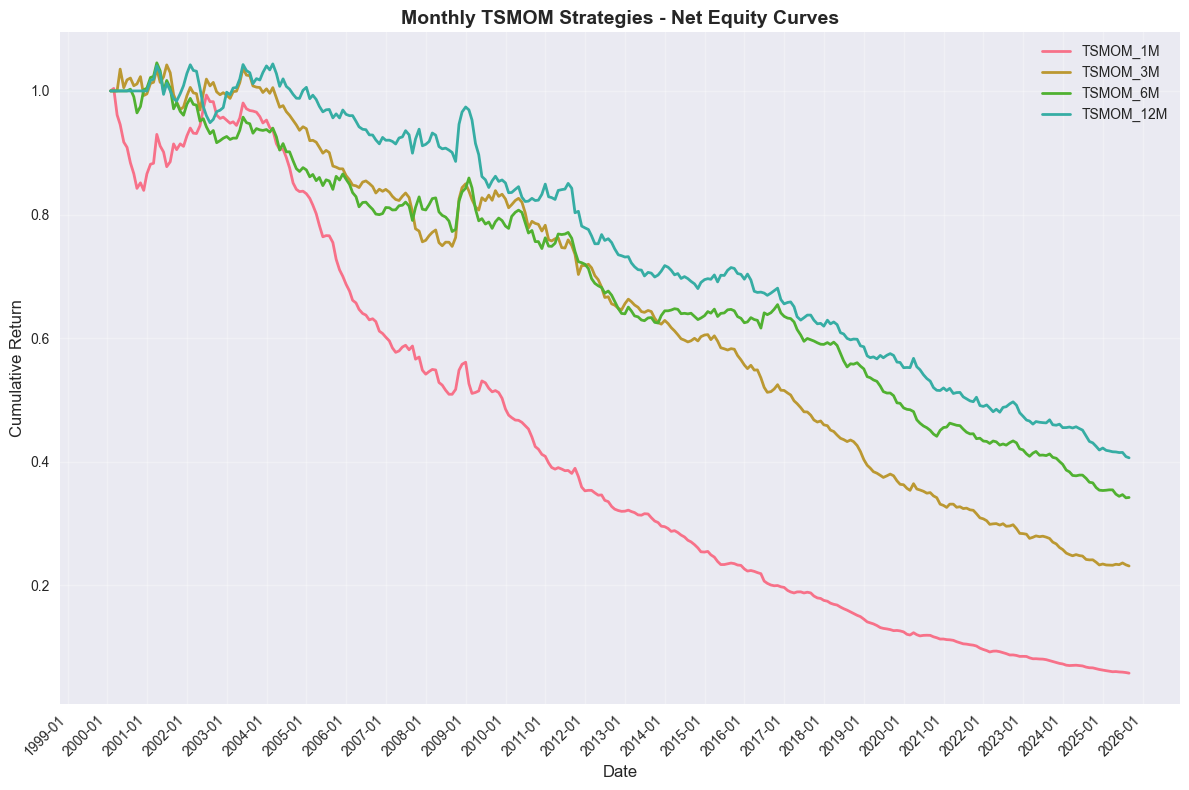

In [5]:
# Plot equity curves for monthly strategies
analyzer.plot_equity_curves(results, save_path='../results/monthly_equity_curves.png')

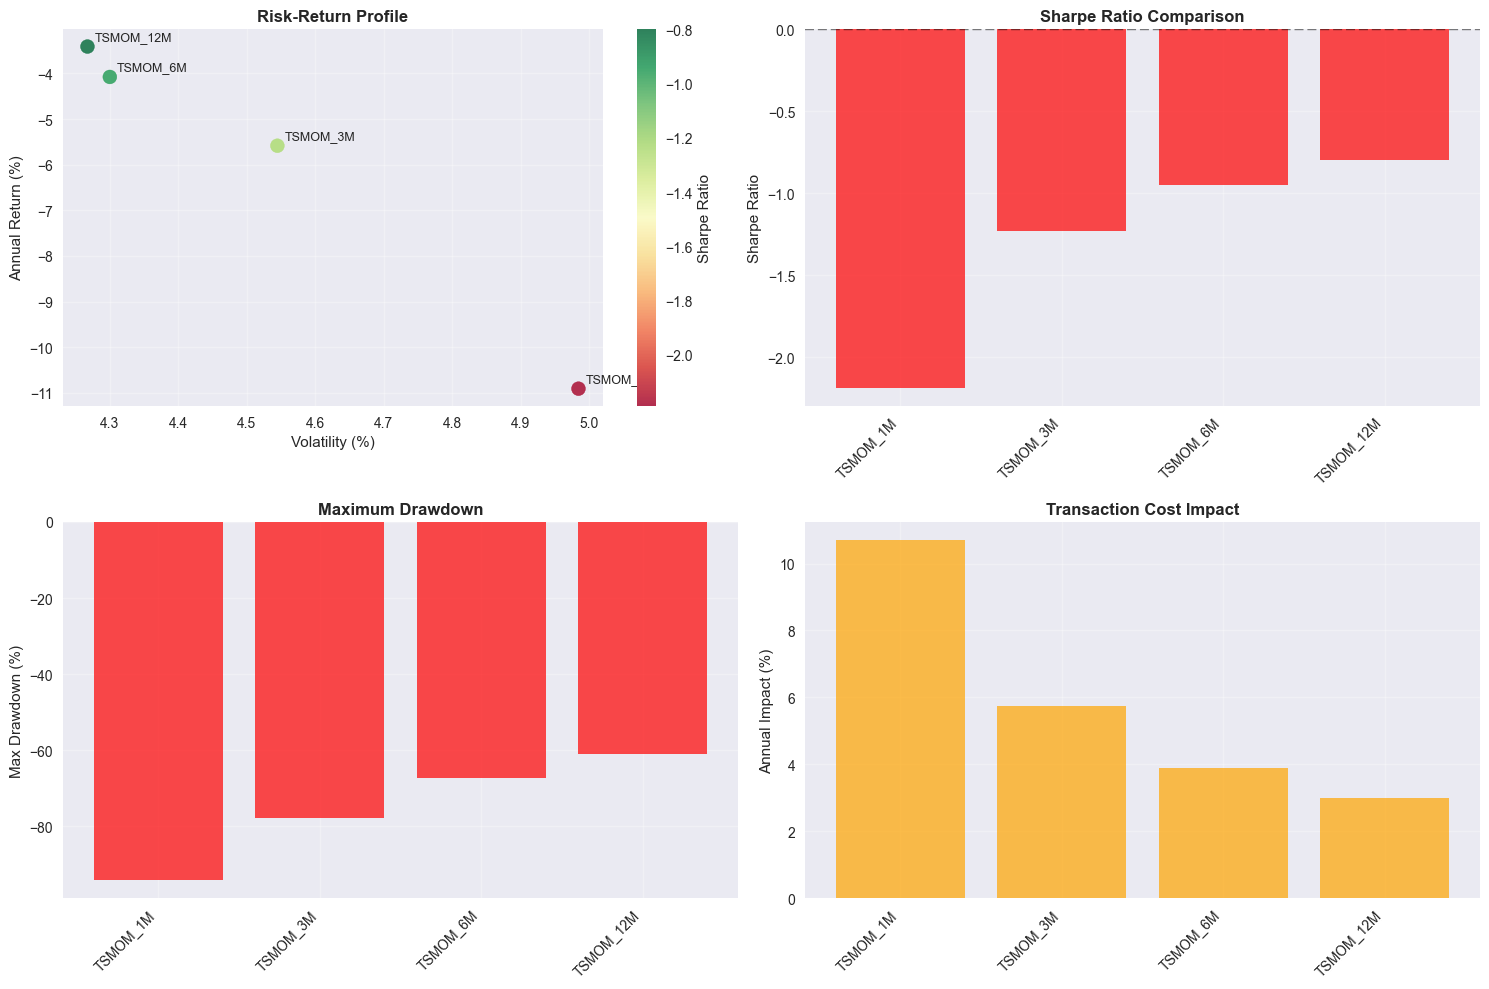

In [6]:
# Plot comprehensive performance analysis for monthly strategies
analyzer.plot_performance_summary(metrics, save_path='../results/monthly_performance_summary.png')

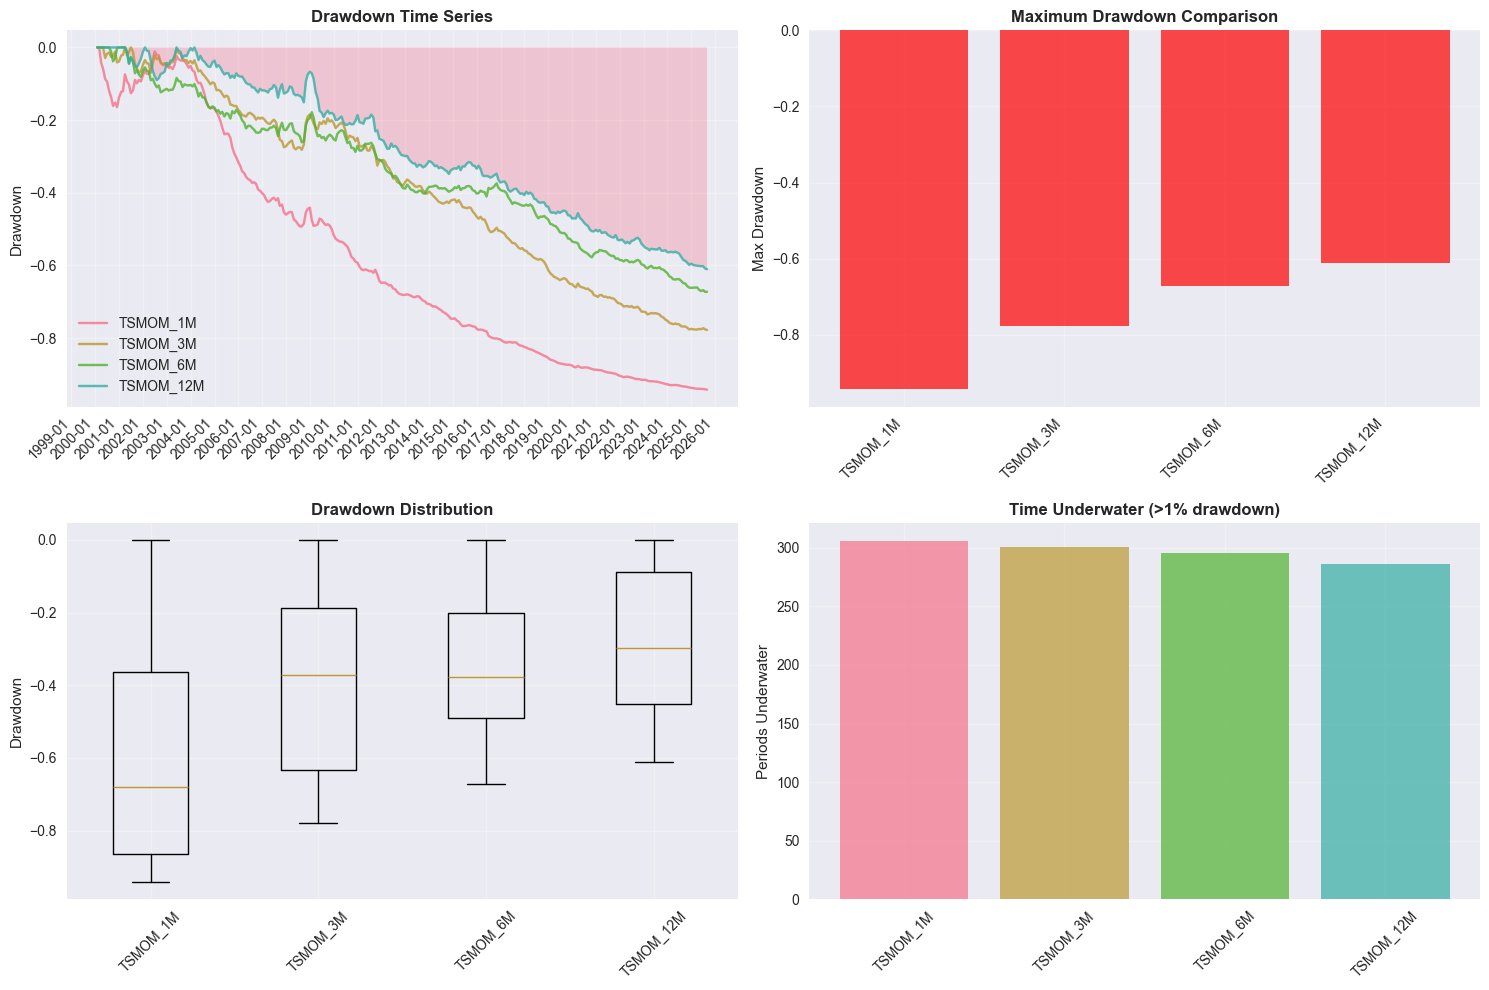

In [7]:
# Plot drawdown analysis for monthly strategies
analyzer.plot_drawdown_analysis(results, save_path='../results/monthly_drawdown_analysis.png')

## Strategy Deep Dive - Monthly Lookback Analysis

In [8]:
# Analyze signal characteristics for monthly strategies
signal_summary = tsmom.get_strategy_summary(signals, monthly)

print("Strategy Signal Analysis:")
print("=" * 40)
display(signal_summary.round(3))

Strategy Signal Analysis:


,Total_Signals,Long_Pct,Short_Pct,Avg_Active_Positions,Total_Return,Annual_Return,Annual_Vol,Sharpe_Ratio
TSMOM_1M,5307.0,50.273,49.727,17.231,-0.077,-0.002,0.047,-0.043
TSMOM_3M,5303.0,50.632,49.368,17.218,0.019,0.002,0.044,0.038
TSMOM_6M,5297.0,51.086,48.914,17.198,-0.067,-0.002,0.043,-0.042
TSMOM_12M,5285.0,51.145,48.855,17.159,-0.122,-0.004,0.043,-0.097


In [9]:
# Compare lookback periods performance
print("Lookback Period Analysis:")
print("=" * 30)

for lookback in [1, 3, 6, 12]:
    strategy_name = f"TSMOM_{lookback}M"
    if strategy_name in metrics.index:
        strategy_metrics = metrics.loc[strategy_name]
        print(f"\n{lookback}M Lookback:")
        print(f"  Sharpe Ratio: {strategy_metrics['Net_Sharpe_Ratio']:.3f}")
        print(f"  Annual Return: {strategy_metrics['Net_Annual_Return']*100:.2f}%")
        print(f"  Max Drawdown: {strategy_metrics['Net_Max_Drawdown']*100:.2f}%")

Lookback Period Analysis:

1M Lookback:
  Sharpe Ratio: -2.188
  Annual Return: -10.91%
  Max Drawdown: -94.21%

3M Lookback:
  Sharpe Ratio: -1.229
  Annual Return: -5.58%
  Max Drawdown: -77.78%

6M Lookback:
  Sharpe Ratio: -0.948
  Annual Return: -4.08%
  Max Drawdown: -67.30%

12M Lookback:
  Sharpe Ratio: -0.799
  Annual Return: -3.41%
  Max Drawdown: -61.05%


## Best Monthly Strategy Analysis

Best Performing Monthly Strategy: TSMOM_12M
Sharpe Ratio: -0.799
Annual Return: -3.41%
Volatility: 4.27%
Max Drawdown: -61.05%
Transaction Cost Impact: 3.00%


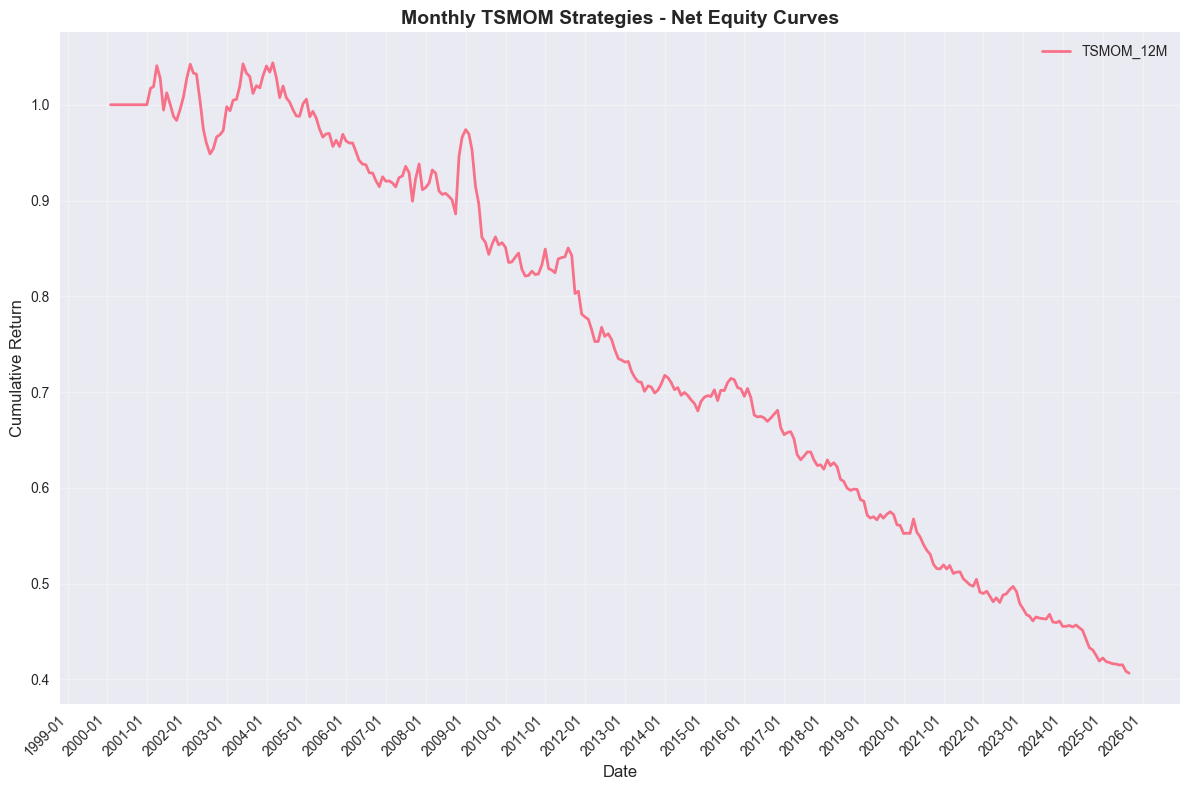

In [10]:
# Identify and analyze best performing monthly strategy
best_strategy = metrics['Net_Sharpe_Ratio'].idxmax()
best_metrics = metrics.loc[best_strategy]

print(f"Best Performing Monthly Strategy: {best_strategy}")
print("=" * 50)
print(f"Sharpe Ratio: {best_metrics['Net_Sharpe_Ratio']:.3f}")
print(f"Annual Return: {best_metrics['Net_Annual_Return']*100:.2f}%")
print(f"Volatility: {best_metrics['Net_Annual_Vol']*100:.2f}%")
print(f"Max Drawdown: {best_metrics['Net_Max_Drawdown']*100:.2f}%")
print(f"Transaction Cost Impact: {best_metrics['TC_Impact_Annual']*100:.2f}%")

# Plot best strategy equity curve
import matplotlib.pyplot as plt

best_results = {best_strategy: results[best_strategy]}
analyzer.plot_equity_curves(best_results)

## Transaction Cost Analysis

Transaction Cost Analysis (5bp per trade):
Average impact: 5.84% annually
Highest impact: 10.71% (TSMOM_1M)
Lowest impact: 3.00% (TSMOM_12M)


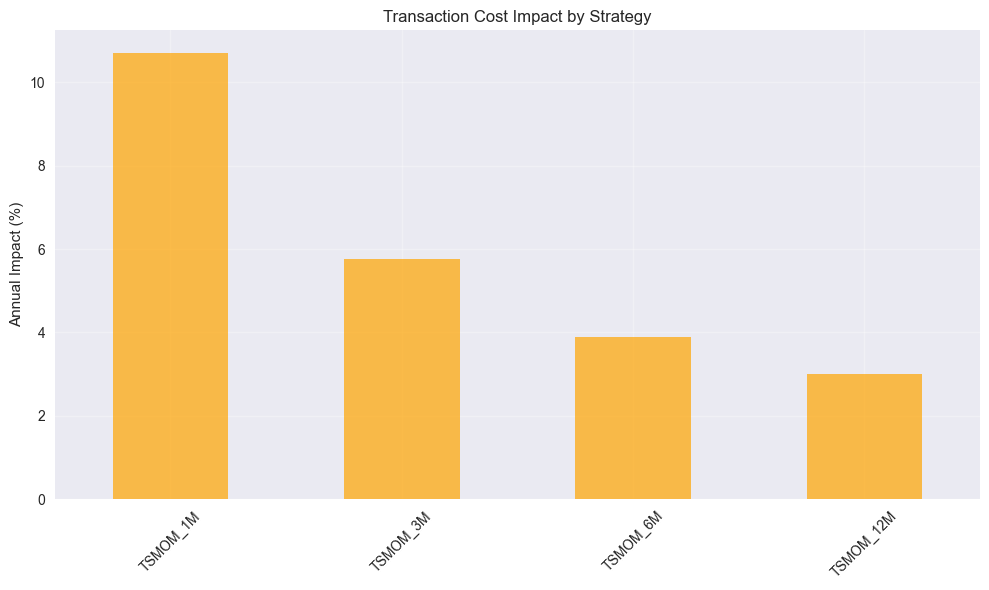

In [11]:
# Analyze transaction cost impact across strategies
tc_impact = (metrics['Gross_Annual_Return'] - metrics['Net_Annual_Return']) * 100

print("Transaction Cost Analysis (5bp per trade):")
print("=" * 45)
print(f"Average impact: {tc_impact.mean():.2f}% annually")
print(f"Highest impact: {tc_impact.max():.2f}% ({tc_impact.idxmax()})")
print(f"Lowest impact: {tc_impact.min():.2f}% ({tc_impact.idxmin()})")

# Plot transaction cost impact
plt.figure(figsize=(10, 6))
tc_impact.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Transaction Cost Impact by Strategy')
plt.ylabel('Annual Impact (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Save Results

In [12]:
# Save all monthly strategy results and analysis
backtest.save_results(results)

# Save additional analysis
summary_table.to_csv('../results/monthly_performance_summary.csv')
signal_summary.to_csv('../results/monthly_signal_analysis.csv')

with open('../results/monthly_summary_report.txt', 'w') as f:
    f.write(summary_report)

print("✅ All monthly strategy results saved to ../results/")
print("\nFiles created:")
print("- tsmom_monthly_equity_curves.parquet")
print("- tsmom_performance_metrics.parquet")
print("- monthly_performance_summary.csv")
print("- monthly_signal_analysis.csv")
print("- monthly_summary_report.txt")
print("- monthly_equity_curves.png")
print("- monthly_performance_summary.png")
print("- monthly_drawdown_analysis.png")

✅ All monthly strategy results saved to ../results/

Files created:
- tsmom_monthly_equity_curves.parquet
- tsmom_performance_metrics.parquet
- monthly_performance_summary.csv
- monthly_signal_analysis.csv
- monthly_summary_report.txt
- monthly_equity_curves.png
- monthly_performance_summary.png
- monthly_drawdown_analysis.png


## Key Findings & Conclusions

### Implementation Notes
- ✅ **Monthly Rebalancing Only**: Consistent 1-month holding period
- ✅ **Bias Prevention**: All signals use `.shift(1)` - no lookahead bias
- ✅ **Vectorized**: Efficient pandas operations throughout
- ✅ **Transaction Costs**: Realistic 5bp forex trading costs included
- ✅ **Data Quality**: 20+ forex pairs, 25+ years of data

### Technical Improvements
- ✅ **Fixed Date Formatting**: Proper x-axis labels and rotation
- ✅ **Fixed Series Errors**: Consistent pandas Series format
- ✅ **Simplified Code**: Monthly-only focus for coherent rebalancing
- ✅ **Unified Interface**: Single frequency for temporal consistency

### Strategy Insights
- **Lookback Comparison**: 1M, 3M, 6M, 12M momentum periods
- **Equal Weight**: Consistent rebalancing across all active positions
- **Cost Impact**: Transaction costs effect on net returns
- **Risk Management**: Monthly drawdown characteristics

### Monthly TSMOM Logic
1. **Signal Generation**: Look at past N months of returns
2. **Position Decision**: Long if cumulative return > 0, Short if < 0
3. **Portfolio Construction**: Equal weight across active positions
4. **Rebalancing**: Monthly frequency with 1-month holding period
5. **Transaction Costs**: 5bp applied on position changes

### Future Enhancements
- Volatility-adjusted position sizing
- Risk parity weighting alternatives
- Momentum score ranking vs binary signals
- Alternative momentum formulations (risk-adjusted)

---

**Framework Status**: ✅ Production-ready with monthly-only coherent rebalancing

**Usage**: Complete analysis focused on monthly momentum strategies with proper temporal consistency.